In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("neighbor.csv")
df.head(2)

,country,neighbor1,neighbor2,neighbor3,neighbor4,neighbor5
0,Aruba,Upper middle income,Uganda,Heavily indebted poor countries (HIPC),Puerto Rico,East Asia & Pacific (IDA & IBRD countries)
1,Afghanistan,Bolivia,Greenland,Cuba,Ethiopia,Monaco


In [3]:
df.shape

(259, 6)

In [4]:
#convert df to ndarray
df = df.values

In [5]:
df[0:2]

array([['Aruba', 'Upper middle income', 'Uganda',
        'Heavily indebted poor countries (HIPC)', 'Puerto Rico',
        'East Asia & Pacific (IDA & IBRD countries)'],
       ['Afghanistan', 'Bolivia', 'Greenland', 'Cuba', 'Ethiopia',
        'Monaco']], dtype=object)

In [6]:
#this function will convert our adjacecny list from matrix form to dictionary form
def add(adjacencyList, country, neighbors):
    adjacencyList.setdefault(country, []).append(neighbors)

In [7]:
#loop over adjacency list matrix to dictionary list
adjacencyList = {}

for i in range(0, len(df)):
    for j in range(1, len(df[i])):
        add(adjacencyList, df[i][0], df[i][j])

In [8]:
#adjacencyList
{k: adjacencyList[k] for k in list(adjacencyList)[:2]}

{'Aruba': ['Upper middle income',
  'Uganda',
  'Heavily indebted poor countries (HIPC)',
  'Puerto Rico',
  'East Asia & Pacific (IDA & IBRD countries)'],
 'Afghanistan': ['Bolivia', 'Greenland', 'Cuba', 'Ethiopia', 'Monaco']}

In [9]:
#create a directed graph using our adjacency list
g = nx.DiGraph(adjacencyList)

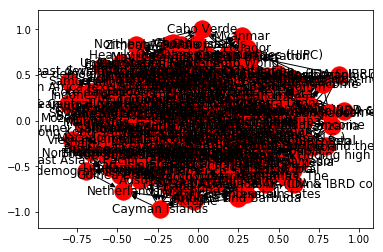

In [35]:
nx.draw_networkx(g)

In [11]:
#write gexf file for gephi
#nx.write_gexf(g, "neighbors.gexf")

In [12]:
############### Additionaly we can add location attributes (latitude and longitude)
############### to every country, so we can arrange our graph using GeoLayout in
############### gephi

In [13]:
#List of countries in our data to match with other csv for adding attributes
countries = df[:,0]

In [14]:
location = pd.read_csv("lat_lon.csv")
location.head(2)

,country,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818


In [15]:
location.shape

(294, 3)

In [16]:
location = location.values

In [17]:
location[0:2]

array([['Andorra', 42.546245, 1.6015540000000001],
       ['United Arab Emirates', 23.424076, 53.847818000000004]],
      dtype=object)

In [18]:
#Check how many matches we have for location csv and data csv
count = 0

for i in range(len(df)):
    for j in range(len(location)):
        if df[i][0] == location[j][0]:
            count = count + 1
count

259

In [19]:
#Create a dictionary of dictionary for location attributes of nodes
nodeList = {}

for country in countries:
    for j in range(len(location)):
        if country == location[j][0]:
            nodeList[country] = {}
            nodeList[country]["Latitude"] = location[j][1]
            nodeList[country]["Longitude"] = location[j][2]

In [20]:
#Check which ones are unmatched from location csv and our dictionary
l1 = []
for key, value in nodeList.items():
    l1.append(key)  
    
notmatched = list(set(countries) - set(l1))

notmatched

[]

In [21]:
#nodeList
{k: nodeList[k] for k in list(nodeList)[:2]}

{'Aruba': {'Latitude': 12.52111, 'Longitude': -69.968338},
 'Afghanistan': {'Latitude': 33.93911, 'Longitude': 67.709953}}

In [22]:
#Append node location attributes to the graph
nx.set_node_attributes(g, nodeList)

In [23]:
############### Next idea is to add an attribue that says which continent a
############### country belongs to so we can color-code our nodes on the graph
############### according to that

In [24]:
continents = pd.read_csv("countries_continents.csv")
continents.head(2)

,Continent,Country
0,Africa,Algeria
1,Africa,Angola


In [25]:
continents.shape

(263, 2)

In [26]:
continents = continents.values

In [27]:
continents[0:2]

array([['Africa', 'Algeria'],
       ['Africa', 'Angola']], dtype=object)

In [28]:
count = 0

for i in range(len(df)):
    for j in range(len(continents)):
        if df[i][0] == continents[j][1]:
            count = count + 1
count

259

In [29]:
#Create a dictionary of dictionary for continent attributes of nodes
nodeList2 = {}

for country in countries:
    for j in range(len(continents)):
        if country == continents[j][1]:
            nodeList2[country] = {}
            nodeList2[country]["Continent"] = continents[j][0]

In [30]:
#Check which ones are unmatched from continents csv and our dictionary
l2 = []
for key, value in nodeList2.items():
    l2.append(key)  
    
notmatched = list(set(countries) - set(l2))

notmatched

[]

In [31]:
#nodeList2
{k: nodeList2[k] for k in list(nodeList2)[:2]}

{'Aruba': {'Continent': 'North America'}, 'Afghanistan': {'Continent': 'Asia'}}

In [32]:
#Append node continent attributes to the graph
nx.set_node_attributes(g, nodeList2)

In [33]:
############### We have set up our graph for visualization ###############

In [37]:
#g.node.data()

In [34]:
#write gexf file for gephi
nx.write_gexf(g, "neighbors3.gexf")